In [1]:
import numpy as np
import collections
import basic_help

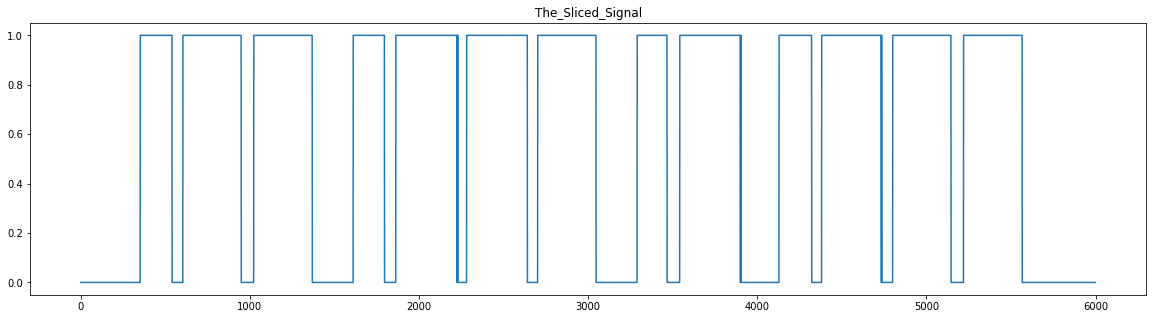

In [2]:
my_slices = basic_help.Slices()
infile = 'doorbell.slices'
dat_sliced = np.fromfile(infile, dtype="float32")
my_slices.burst = np.array(dat_sliced,np.bool)
basic_help.plot_slice(my_slices.burst)

In [3]:
# my_slices = get_clean_trans(my_slices)
my_slices = basic_help.get_discriminators(my_slices)
print(my_slices.ones_threshold,my_slices.zeros_threshold)
print(my_slices.transitions)
print(my_slices.burst_ends)

271.5 146.0
[ 351  539  603  948 1022 1368 1610 1795 1862 2230 2281 2640 2701 3046 3289
 3466 3541 3904 4128 4321 4380 4735 4800 5145 5219 5566]
[351, 5566]


[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]


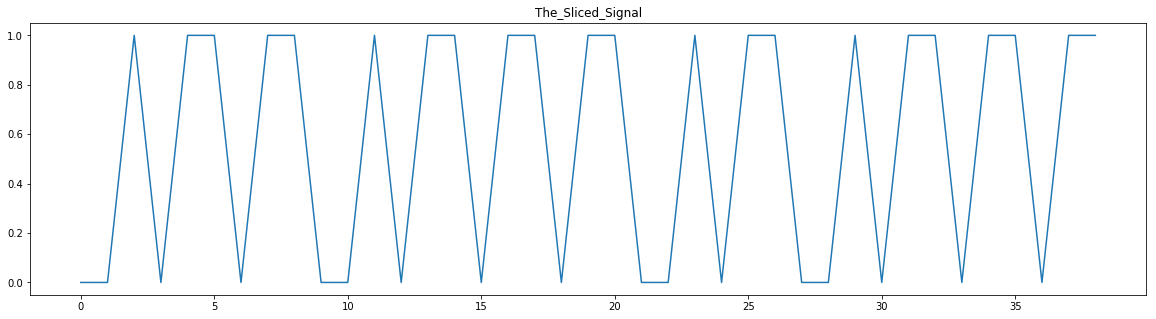

In [4]:
my_slices = basic_help.get_symbols(my_slices)
print(my_slices.symbols)
basic_help.plot_slice(my_slices.symbols)


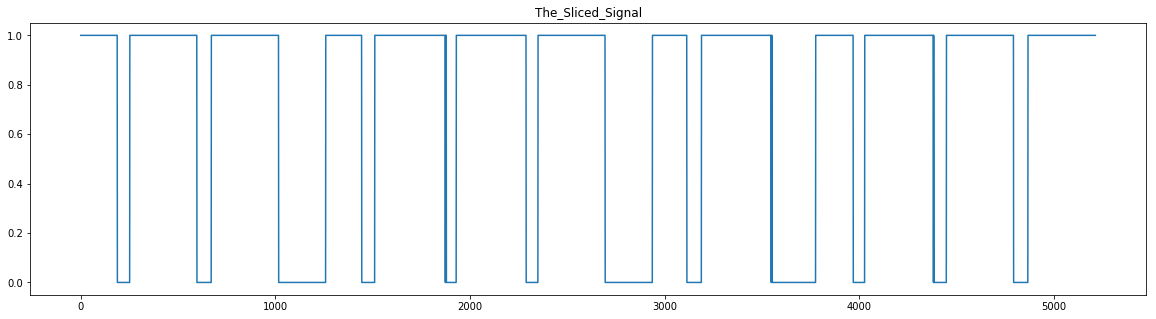

271.5 146.0
[ 351  539  603  948 1022 1368 1610 1795 1862 2230 2281 2640 2701 3046 3289
 3466 3541 3904 4128 4321 4380 4735 4800 5145 5219 5566]


In [10]:
539-351

188

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


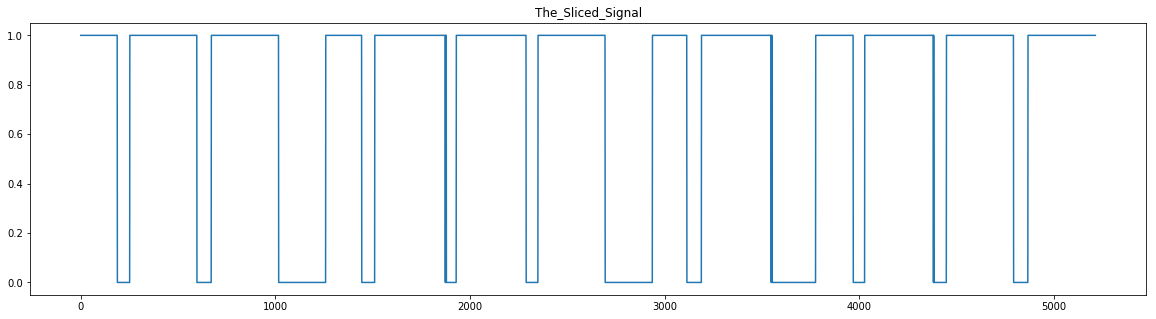

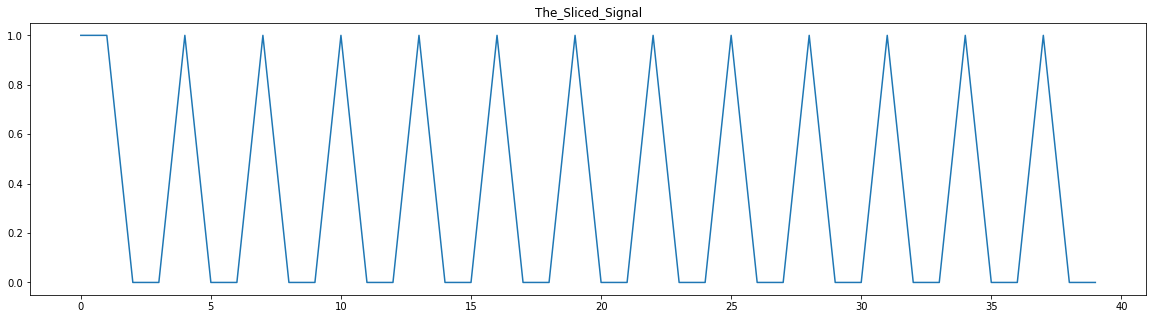

[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]


In [5]:
my_slices = basic_help.get_symbols(my_slices)
basic_help.plot_slice(my_slices.burst)
basic_help.plot_slice(my_slices.symbols)
print(my_slices.symbols)

In [7]:
my_slices.zeros_short

nan

In [4]:
my_slices = basic_help.get_discriminators(my_slices)

burst_start = discs[2][0] + 1
burst_end = discs[2][1] + 1
only_burst = numpy_bools[burst_start:burst_end]
trans = basic_help.get_clean_trans(only_burst)
trans
print(basic_help.get_symbols(trans, discs))

[[1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0], 883, 463, 590, 163]


In [12]:
my_symbols = Symbol()


[]

In [9]:
# what is this full of? Falses and Trues, hopefullly in cohesive blocks
numpy_bools[1000:2000]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

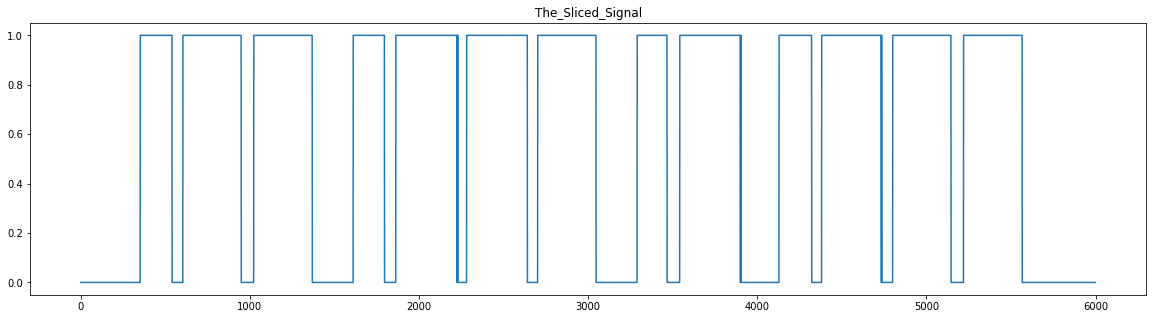

In [17]:
# see what it looks like
basic_help.plot_slice(numpy_bools[:])

In [16]:
# first get value of where transitions occure
diff_pos = np.diff(numpy_bools)
# these values are a list of positions of transitions
diff_pos_loc = np.where(diff_pos)[0]
diff_next = np.roll(diff_pos_loc,-1)
# diff_pos is now a list with a True at each place the value changes 
#      (so the edges from false to true, and true to false
#      basic_help.plot_slice(diff_pos)
# diff_pos_loc is the position value at which a transition is made
#      array([ 351,  539,  603,...5219, 5566])
# diff_next -- rolled everything left...to consume it? needed to assess gaps in for loop
# diff_next


array([ 539,  603,  948, 1022, 1368, 1610, 1795, 1862, 2224, 2226, 2230,
       2281, 2640, 2701, 3046, 3289, 3466, 3541, 3899, 3901, 3904, 4128,
       4321, 4380, 4733, 4734, 4735, 4800, 5145, 5219, 5566,  351])

In [17]:
# this is the container in which the symbols woll be appended as True or False
symbols = np.array([],np.bool)

In [46]:
## define a minimum legitimate transition time/samples
min_width = 20
abberent_bursts = []
transitions = diff_pos_loc

In [43]:
counter = 0
for current_loc, next_loc in zip(diff_pos_loc, diff_next):
    if next_loc < current_loc:
        burst_slice_range = [next_loc, current_loc]
        continue
    if next_loc - current_loc < min_width:
        # mutate the original list of transitions to ignore abberations
        abberent_bursts.append(counter)
        continue
    #print(current_loc,next_loc,(next_loc-current_loc),sum(numpy_bools[current_loc+1:next_loc]))
    counter = counter + 1
print(abberent_bursts)
print(burst_slice_range)
#collections.

351 539 188 187
539 603 64 0
603 948 345 344
948 1022 74 0
1022 1368 346 345
1368 1610 242 0
1610 1795 185 184
1795 1862 67 0
1862 2224 362 361
2230 2281 51 0
2281 2640 359 358
2640 2701 61 0
2701 3046 345 344
3046 3289 243 0
3289 3466 177 176
3466 3541 75 0
3541 3899 358 357
3904 4128 224 0
4128 4321 193 192
4321 4380 59 0
4380 4733 353 352
4735 4800 65 0
4800 5145 345 344
5145 5219 74 0
5219 5566 347 346
[9, 9, 17, 17, 21, 21]
[351, 5566]


In [44]:
counter = 0
for current_loc, next_loc in zip(diff_pos_loc, diff_next):
    if next_loc < current_loc:
        burst_slice_range = [next_loc, current_loc]
        continue
    if next_loc - current_loc < min_width:
        # mutate the original list of transitions to ignore abberations
        print("abberation detected!")
    print(current_loc,next_loc,(next_loc-current_loc),sum(numpy_bools[current_loc+1:next_loc]))
    counter = counter + 1

print(burst_slice_range)
#collections.

351 539 188 187
539 603 64 0
603 948 345 344
948 1022 74 0
1022 1368 346 345
1368 1610 242 0
1610 1795 185 184
1795 1862 67 0
1862 2224 362 361
abberation detected!
2224 2226 2 0
abberation detected!
2226 2230 4 3
2230 2281 51 0
2281 2640 359 358
2640 2701 61 0
2701 3046 345 344
3046 3289 243 0
3289 3466 177 176
3466 3541 75 0
3541 3899 358 357
abberation detected!
3899 3901 2 0
abberation detected!
3901 3904 3 2
3904 4128 224 0
4128 4321 193 192
4321 4380 59 0
4380 4733 353 352
abberation detected!
4733 4734 1 0
abberation detected!
4734 4735 1 0
4735 4800 65 0
4800 5145 345 344
5145 5219 74 0
5219 5566 347 346
[351, 5566]


In [60]:
counter = 0
for current_loc, next_loc in zip(diff_pos_loc, diff_next):
    if next_loc < current_loc:
        burst_slice_range = [next_loc, current_loc]
        continue
    if next_loc - current_loc < min_width:
        # mutate the original list of transitions to ignore abberations
        abberent_bursts.append(counter)
    print(current_loc,next_loc,(next_loc-current_loc),sum(numpy_bools[current_loc+1:next_loc]))
    counter = counter + 1
print(abberent_bursts)
print(burst_slice_range)
print(transitions)
transitions = np.delete(transitions,abberent_bursts)
#print(np.delete(transitions,abberent_bursts))
print(transitions)
#collections.

351 539 188 187
539 603 64 0
603 948 345 344
948 1022 74 0
1022 1368 346 345
1368 1610 242 0
1610 1795 185 184
1795 1862 67 0
1862 2224 362 361
2224 2226 2 0
2226 2230 4 3
2230 2281 51 0
2281 2640 359 358
2640 2701 61 0
2701 3046 345 344
3046 3289 243 0
3289 3466 177 176
3466 3541 75 0
3541 3899 358 357
3899 3901 2 0
3901 3904 3 2
3904 4128 224 0
4128 4321 193 192
4321 4380 59 0
4380 4733 353 352
4733 4734 1 0
4734 4735 1 0
4735 4800 65 0
4800 5145 345 344
5145 5219 74 0
5219 5566 347 346
[9, 10, 19, 20, 25, 26, 9, 10, 19, 20, 25, 26, 9, 10, 19, 20, 25, 26, 9, 10, 19, 20, 25, 26, 9, 10, 19, 20, 25, 26, 9, 10, 19, 20, 25, 26]
[351, 5566]
[ 351  539  603  948 1022 1368 1610 1795 1862 2224 2226 2230 2281 2640 2701
 3046 3289 3466 3541 3899 3901 3904 4128 4321 4380 4733 4734 4735 4800 5145
 5219 5566]
[ 351  539  603  948 1022 1368 1610 1795 1862 2230 2281 2640 2701 3046 3289
 3466 3541 3904 4128 4321 4380 4735 4800 5145 5219 5566]


In [68]:
abberent_bursts = []
true_width_list = []
false_width_list = []
counter = 0
transitions_next = np.roll(transitions,-1)
for current_loc, next_loc in zip(transitions, transitions_next):
    if next_loc < current_loc:
        burst_slice_range = [next_loc, current_loc]
        continue
    width = next_loc-(current_loc+1)
    value = sum(numpy_bools[current_loc+1:next_loc])
    if value > 10:
        true_width_list.append(width)
    else:
        false_width_list.append(width)
print(abberent_bursts)
print(burst_slice_range)
print(true_width_list)
print(false_width_list)
#collections.

[]
[351, 5566]
[187, 344, 345, 184, 367, 358, 344, 176, 362, 192, 354, 344, 346]
[63, 73, 241, 66, 50, 60, 242, 74, 223, 58, 64, 73]


In [73]:
print(collections.Counter(true_width_list))
print(collections.Counter(false_width_list))
print(sorted(true_width_list))
print(sorted(false_width_list))
print(sorted(false_width_list)[len(false_width_list)-1]-sorted(false_width_list)[0])
print(sorted(true_width_list)[len(true_width_list)-1]-sorted(true_width_list)[0])

Counter({344: 3, 187: 1, 345: 1, 184: 1, 367: 1, 358: 1, 176: 1, 362: 1, 192: 1, 354: 1, 346: 1})
Counter({73: 2, 63: 1, 241: 1, 66: 1, 50: 1, 60: 1, 242: 1, 74: 1, 223: 1, 58: 1, 64: 1})
[176, 184, 187, 192, 344, 344, 344, 345, 346, 354, 358, 362, 367]
[50, 58, 60, 63, 64, 66, 73, 73, 74, 223, 241, 242]
192
191


In [81]:
sum(sorted(false_width_list)[len(false_width_list)-1:len(false_width_list)-5])

0

In [93]:
sor_false = sorted(false_width_list)
sor_true = sorted(true_width_list)
false_len = len(sor_false)
true_len = len(sor_true)

In [94]:
sum(sor_true[true_len-4:true_len])/4

360.25

In [101]:
diff = sor_true[true_len-1] - sor_true[0]
diff/2

95.5

In [104]:
diff/2

95.5

In [107]:
sor_true[true_len-1]-(diff/2)

271.5

In [108]:
sor_true[0]+(diff/2)

271.5

In [109]:
diff = sor_false[false_len-1] - sor_false[0]
diff/2

96.0

In [110]:
sor_false[false_len-1]-(diff/2)

146.0

In [111]:
sor_false[0]+(diff/2)

146.0

In [113]:
true_discriminator = sor_true[0]+(sor_true[true_len-1] - sor_true[0])/2
true_discriminator

271.5

In [115]:
false_discriminator = sor_false[0]+(sor_false[false_len-1] - sor_false[0])/2
false_discriminator

146.0

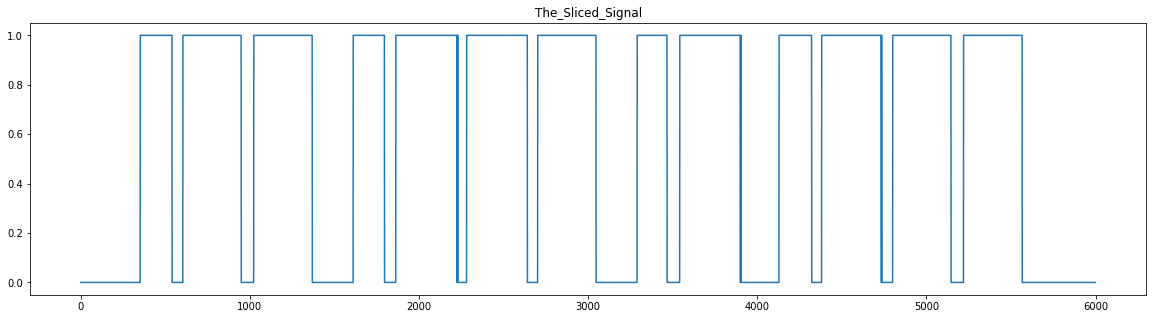

In [18]:
### Get Discriminators for True and False signals
# [true_discriminator,false_discriminator,burst_ends]
discs = basic_help.get_discriminators(dat_sliced)
discs


In [4]:
# assign thresholds for lon or short pulses of data
ones_threshold = discs[0]
zeros_threshold = discs[1]
burst_start = discs[2][0] + 1
burst_end = discs[2][1] + 1

only_burst = numpy_bools[burst_start:burst_end]

In [5]:
only_burst

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [38]:
trans = basic_help.get_clean_trans(only_burst)
trans

array([ 187,  251,  596,  670, 1016, 1258, 1443, 1510, 1878, 1929, 2288,
       2349, 2694, 2937, 3114, 3189, 3552, 3776, 3969, 4028, 4383, 4448,
       4793, 4867])

In [40]:
# assign thresholds for lon or short pulses of data
ones_threshold = discs[0]
zeros_threshold = discs[1]
symbols = []
high = True
last = 0
high_length_long = []
high_length_short = []
low_length_long = []
low_length_short = []

for val in trans:
    pulse = 0
    pulse = val - last
    last = val
    if high:
        if pulse > ones_threshold:
            symbols.append(1)
            symbols.append(1)
            high_length_long.append(pulse)
        else:
            symbols.append(1)
            high_length_short.append(pulse)
        high = False
        continue
    if not high:
        if pulse > zeros_threshold:
            symbols.append(0)
            symbols.append(0)
            low_length_long.append(pulse)
        else:
            symbols.append(0)
            low_length_short.append(pulse)
        high = True
print(symbols)

            
            

345
346
368
359
345
363
355
345
[1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0]


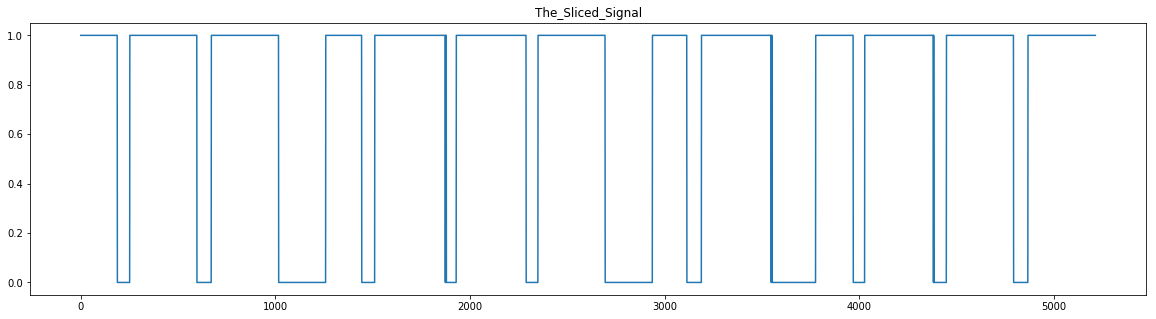

In [37]:
basic_help.plot_slice(only_burst)

In [23]:
# Now try to determine the pulse length for re-creation of the signal

# the working sample rate from the GNURadio graph war 400000 Samples/Second
rate = 400000
# The answer will be on the order of microseconds ... 400 or so
samples = 187*(1/400000)

In [43]:
print("Long 1 pulses:")
for val in high_length_long:
    print(val*(1/400000))
print("\nShort 1 pulses:")
for val in high_length_short:
    print(val*(1/400000))
print("\nLong 0 pulses:")
for val in low_length_long:
    print(val*(1/400000))
print("\nShort 0 pulses:")
for val in low_length_short:
    print(val*(1/400000))

Long 1 pulses:
0.0008625
0.000865
0.00092
0.0008975
0.0008625
0.0009075
0.0008875
0.0008625

Short 1 pulses:
0.0004675
0.0004625
0.0004425
0.0004825

Long 0 pulses:
0.000605
0.0006075
0.00056

Short 0 pulses:
0.00016
0.000185
0.0001675
0.0001275
0.0001525
0.0001875
0.0001475
0.0001625
0.000185


In [57]:
average_long_1 = int(np.average(high_length_long)*(10/4))
average_short_1 = int(np.average(high_length_short)*(10/4))
average_long_0 = int(np.average(low_length_long)*(10/4))
average_short_0 = int(np.average(low_length_short)*(10/4))
print("11 , 1 , 00, 0 -- all in microseconds")
print(average_long_1,average_short_1,average_long_0,average_short_0)

11 , 1 , 00, 0 -- all in microseconds
883 463 590 163


In [55]:
883/163

5.41717791411043